<a href="https://colab.research.google.com/github/NovrianPratama/Aplikasi-Login/blob/main/Dataset_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menggunakan Dataset dari TensorFlow

Ada dua cara untuk mengakses dataset yang sudah disediakan TensorFlow yaitu melalui tf.data.Datasets dan juga TensorFlow Datasets.

[TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) untuk melihat dataset apa saja yang tersedia dari library TensorFlow.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D

## Membuat Model Menggunakan tf.data.Datasets

In [3]:
# Load dataset mnist
mnist = tf.keras.datasets.mnist

(X_train,y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5


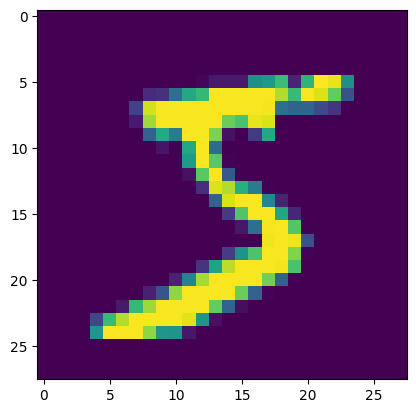

In [4]:
# menampilkan label dan salah satu gambar dari data latih

np.set_printoptions(linewidth=200) # Mengatur opsi tampilan array NumPy.
plt.imshow(X_train[0]) # menampilkan gambar dalam bentuk array.
print(y_train[0]) # mencetak label dari gambar pertama di dataset pelatihan.

In [5]:
# Melakukan normalisasi dengan membagi setiap piksel pada gambar
# sebesar 255 karena nilai sebuah piksel berkisar dari 0 sampai 255.

X_train  = X_train / 255.0
X_train = X_train / 255.0

Penjelasan:

kode tersebut membagi nilai piksel dari gambar pelatihan (gambar_latih) dengan 255.0. Karena nilai piksel pada umumnya dalam rentang 0 hingga 255, pembagian dengan nilai 255.0 akan menghasilkan nilai piksel yang lebih kecil yaitu dalam rentang 0 hingga 1. Ini membantu model pembelajaran mesin untuk belajar lebih efisien karena nilai yang lebih kecil cenderung memiliki efek yang lebih stabil selama proses pembelajaran.

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist_tfdata = model.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7612 - loss: 0.8028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9225 - loss: 0.2649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9385 - loss: 0.2096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9517 - loss: 0.1654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9610 - loss: 0.1382
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9665 - loss: 0.1154
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9705 - loss: 0.0999
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9718 - loss: 0.0927
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9749 - loss: 0.0823
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0742


## Membuat Model Menggunakan TensorFlow Datasets

TensorFlow menyediakan kumpulan dataset siap pakai untuk dilatih dengan TensorFlow, Jax, dan framework machine learning lainnya. TensorFlow Dataset (TFDS) bertugas untuk melakukan pengunduhan dan menyiapkan data secara deterministik dengan menggunakan tf.data.Dataset (atau np.array).

TFDS adalah wrapper tingkat tinggi di sekitar tf.data.  membaca panduan resmi dari TensorFlow pada tautan berikut: [tf.data](https://www.tensorflow.org/guide/data?hl=id).

In [7]:
# Import library tfds
import tensorflow_datasets as tfds

melihat list atau daftar dari dataset yang tersedia pada TFDS. Untuk melihat seluruh dataset yang tersedia, kita bisa menggunakan fungsi tfds.list_builders() atau dapat dilihat pada katalog [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/overview?hl=id).

In [8]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

In [9]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.BFWM0U_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.BFWM0U_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


Penjelasan kode:
- Fungsi load() memungkinkan Anda untuk menggunakan dataset yang telah disediakan oleh TensorFlow Datasets.
- Parameter pertama ('mnist') menunjukkan nama dataset yang ingin dimuat.
- Parameter kedua ('split='train'') menunjukkan bahwa kita hanya memuat bagian pelatihan dari dataset MNIST.
- Parameter ketiga ('shuffle_files=True') mengindikasikan bahwa file-file dataset akan diacak sebelum dimuat, sehingga urutan data tidak akan tetap sama setiap kali dataset dimuat ulang

assert isinstance adalah sebuah pernyataan asersi (assertion statement) yang memeriksa apakah variabel ds adalah sebuah objek tf.data.Dataset. Assertion ini berguna untuk memastikan bahwa data yang dimuat benar-benar dalam bentuk dataset TensorFlow yang dapat digunakan untuk melatih model.

In [10]:
# membagi data training dan testing

(train_img, train_label), (test_img, test_label) = tfds.as_numpy(tfds.load('mnist',
                          split=['train','test'],
                          batch_size=-1, # Mengembalikan seluruh dataset sebagai satu array besar.
                          as_supervised=True)) # dataset akan dikembalikan dalam bentuk pasangan (gambar, label), bukan dalam bentuk dictionary.

In [19]:
# Menyusun arsitektur layer model
model_tfds = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # mengekstraksi fitur dari gambar input menggunakan operasi konvolusi
    MaxPooling2D(2, 2), # mereduksi dimensi spasial dari representasi gambar berdasarkan layer sebelumnya
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(), # mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi.
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # output layer
])

# inisialisasi optimizer
optimizerRM = tf.keras.optimizers.RMSprop(learning_rate=0.1) # menggunakan optimizer rmsprop

# melakukan compile untuk menentukan konfigurasi yang tepat
model_tfds.compile(optimizer=optimizerRM,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# melatih model
hist_tfds = model_tfds.fit(train_img, train_label, batch_size=50, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.1034 - loss: 261973.3594
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.1034 - loss: 2.3130
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.1035 - loss: 2.3130
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.1019 - loss: 2.3126
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 48s 40ms/step - accuracy: 0.1036 - loss: 2.3114


In [20]:
# Melakukan evaluasi model
model_tfds.evaluate(test_img, test_label, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.1108 - loss: 2.3238


[2.3260936737060547, 0.11349999904632568]

# Penggunaan Batch Loading

In [13]:
# Import dan membagi data train dan testing
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# normalisasi data img
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [17]:
# Membuat model
model_batch = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer_batch = tf.keras.optimizers.Adam()
model_batch.compile(optimizer=optimizer_batch,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Melatih model dengan batch 32
hist_noBatch = model_batch.fit(training_images, training_labels, batch_size=32, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8816 - loss: 0.4284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9637 - loss: 0.1198
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9768 - loss: 0.0773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0567
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9864 - loss: 0.0442


In [18]:
# Melatih model dengan batch 32
hist_batch = model_batch.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9924 - loss: 0.0267
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9956 - loss: 0.0200
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9963 - loss: 0.0170
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9972 - loss: 0.0148
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0132
